In [553]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV   # Linear least squares with l2 regularization
from lls_1 import LinearLeastSquare

In [554]:
data = pd.read_csv("HousePrice.csv")
data.head(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [555]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3473 non-null   int64  
 1   Room        3473 non-null   int64  
 2   Parking     3473 non-null   bool   
 3   Warehouse   3473 non-null   bool   
 4   Elevator    3473 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3473 non-null   float64
 7   Price(USD)  3473 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 146.0+ KB


In [556]:
data.drop("Address" , axis=1 , inplace=True)

In [557]:
data['Parking'].replace([True,False],[1,0],inplace=True)
data['Warehouse'].replace([True,False],[1,0],inplace=True)
data['Elevator'].replace([True,False],[1,0],inplace=True)

In [558]:
data[data.duplicated()]

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
55,61,1,1,1,0,2.030000e+09,67666.67
78,74,2,1,1,1,1.700000e+09,56666.67
79,88,3,0,0,1,5.600000e+08,18666.67
80,63,1,1,1,1,2.150000e+09,71666.67
81,114,3,1,1,1,5.500000e+09,183333.33
...,...,...,...,...,...,...,...
3453,80,2,1,1,1,2.250000e+09,75000.00
3455,55,1,1,1,1,2.300000e+09,76666.67
3456,60,1,1,1,1,1.950000e+09,65000.00
3470,75,2,0,0,0,3.650000e+08,12166.67


In [559]:
data.drop_duplicates(inplace=True)
data[data.duplicated()]

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)


In [560]:
data["Price(USD)"] = data["Price(USD)"].astype(dtype="float64") # float
data["Price(USD)_2023"] =data["Price(USD)"].multiply(49).floordiv(30).round(decimals=0)#.map('{:,.0f}'.format) # object

In [561]:
data.isnull().sum()

Area               0
Room               0
Parking            0
Warehouse          0
Elevator           0
Price              0
Price(USD)         0
Price(USD)_2023    0
dtype: int64

In [562]:
data.loc[: ,"Price"] = data["Price"].map('{:,.0f}'.format)

In [563]:
data["Price"] = [float(str(i).replace(",",""))for i in data["Price"]]

In [564]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3055 entries, 0 to 3472
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             3055 non-null   int64  
 1   Room             3055 non-null   int64  
 2   Parking          3055 non-null   int64  
 3   Warehouse        3055 non-null   int64  
 4   Elevator         3055 non-null   int64  
 5   Price            3055 non-null   float64
 6   Price(USD)       3055 non-null   float64
 7   Price(USD)_2023  3055 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 214.8 KB


In [565]:
data

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Price(USD)_2023
0,63,1,1,1,1,1.850000e+09,61666.67,100722.0
1,60,1,1,1,1,1.850000e+09,61666.67,100722.0
2,79,2,1,1,1,5.500000e+08,18333.33,29944.0
3,95,2,1,1,1,9.025000e+08,30083.33,49136.0
4,123,2,1,1,1,7.000000e+09,233333.33,381111.0
...,...,...,...,...,...,...,...,...
3466,113,3,1,1,1,3.170000e+09,105666.67,172588.0
3467,63,1,1,1,0,1.890000e+09,63000.00,102900.0
3468,86,2,1,1,1,3.500000e+09,116666.67,190555.0
3469,83,2,1,1,1,6.800000e+09,226666.67,370222.0


In [566]:
X = np.array(data[["Area","Room","Parking","Warehouse","Elevator"]])
Y = np.array(data[["Price(USD)_2023"]])

In [567]:
X , Y

(array([[63,  1,  1,  1,  1],
        [60,  1,  1,  1,  1],
        [79,  2,  1,  1,  1],
        ...,
        [86,  2,  1,  1,  1],
        [83,  2,  1,  1,  1],
        [82,  2,  0,  1,  1]], dtype=int64),
 array([[100722.],
        [100722.],
        [ 29944.],
        ...,
        [190555.],
        [370222.],
        [ 19600.]]))

In [568]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y ,shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2291, 5)
(764, 5)
(2291, 1)
(764, 1)


### Custom LLs

In [569]:

lls_1 = LinearLeastSquare()
lls_1.fit(X_train ,Y_train)
Y_pred = lls_1.predict(X_test)

In [570]:
MAE = lls_1.evaluate(X_test,Y_test , "mae")
MSE =lls_1.evaluate(X_test,Y_test,"mse")
RMSE = lls_1.evaluate(X_test,Y_test,"rmse")

In [571]:
print('Mean Absolute Error Custom LLs:',MAE)
print('Mean Square Error Custom LLs:',MSE)
print('Root Mean Square Error Custom LLs:',RMSE)

Mean Absolute Error Custom LLs: 168223.74142787332
Mean Square Error Custom LLs: 115859486822.62352
Root Mean Square Error Custom LLs: 340381.38436557236


### Scikit-Learn's Linear Regression 


In [572]:
reg = LinearLeastSquare()
reg.fit(X_train ,Y_train)
Y_pred_regression = reg.predict(X_test)

In [573]:
MAE_reg = np.sum(np.abs(Y_test - Y_pred_regression)) / len(Y_test)
MSE_reg = np.sum((Y_test - Y_pred_regression) ** 2 ) / len(Y_test)
RMSE_reg = np.sqrt(np.sum((Y_test - Y_pred_regression) ** 2 ) / len(Y_test))
print('Mean Absolute Error Linear Regression:',MAE_reg)
print('Mean Square Error Linear Regression:',MSE_reg)
print('Root Mean Square Error Linear Regression:',RMSE_reg)

Mean Absolute Error Linear Regression: 168223.74142787332
Mean Square Error Linear Regression: 115859486822.62352
Root Mean Square Error Linear Regression: 340381.38436557236


### RidgeCV

In [574]:
ridgecv = RidgeCV()
ridgecv.fit(X_train ,Y_train)
Y_pred_ridgecv = ridgecv.predict(X_test)

In [575]:
MAE_ridgecv = np.sum(np.abs(Y_test - Y_pred_ridgecv)) / len(Y_test)
MSE_ridgecv = np.sum((Y_test - Y_pred_ridgecv) ** 2 ) / len(Y_test)
RMSE_ridgecv = np.sqrt(np.sum((Y_test - Y_pred_ridgecv) ** 2) / len(Y_test))
print('Mean Absolute Error RidgeCV:',MAE_ridgecv)
print('Mean Square Error RidgeCV:',MSE_ridgecv)
print('Root Mean Square Error RidgeCV:',RMSE_ridgecv)

Mean Absolute Error RidgeCV: 162591.84225633112
Mean Square Error RidgeCV: 104729155968.96008
Root Mean Square Error RidgeCV: 323618.8436555574


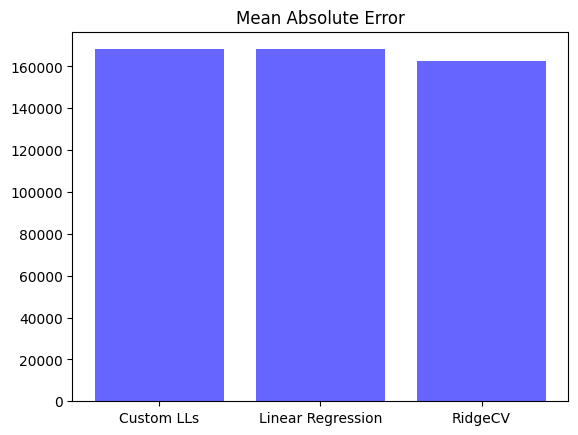

In [576]:
plt.bar(['Custom LLs' , 'Linear Regression' , 'RidgeCV'] , [MAE ,MAE_reg ,MAE_ridgecv] ,color='#6666ff')
plt.title('Mean Absolute Error')
plt.show()

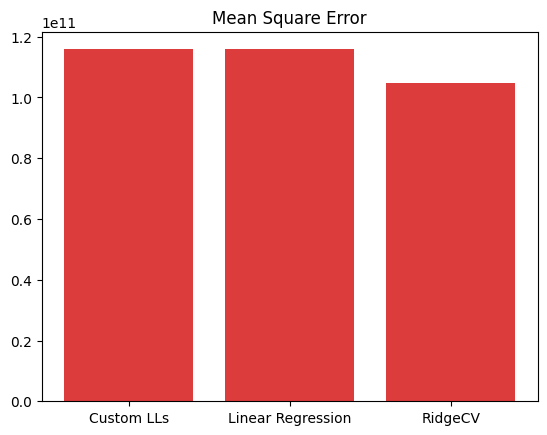

In [577]:
plt.bar(['Custom LLs' , 'Linear Regression' , 'RidgeCV'] , [MSE ,MSE_reg ,MSE_ridgecv] ,color='#dd3c3c')
plt.title('Mean Square Error')
plt.show()

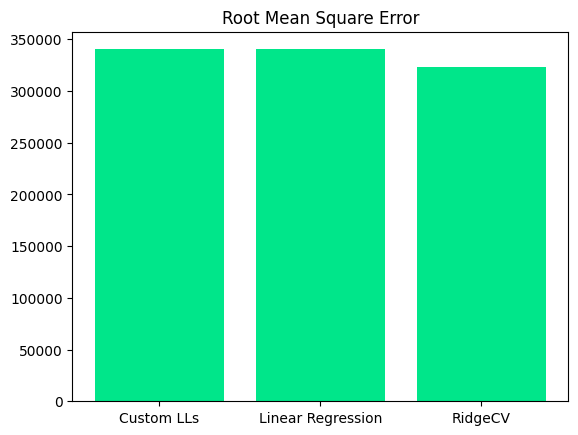

In [578]:
plt.bar(['Custom LLs' , 'Linear Regression' , 'RidgeCV'] ,[RMSE,RMSE_reg,RMSE_ridgecv] ,color='#00e68a')
plt.title('Root Mean Square Error')
plt.show()

In [579]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [580]:
models = ['Custom LLS', 'Linear Regression', 'RidgeCV']
mae_values = [MAE ,MAE_reg ,MAE_ridgecv]
mse_values = [MSE ,MSE_reg ,MSE_ridgecv]
rmse_values = [RMSE,RMSE_reg,RMSE_ridgecv]
fig = make_subplots(rows=1, cols=3, subplot_titles=['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)'])
fig.add_trace(go.Bar(x=models, y=mae_values, name='MAE'), row=1, col=1)
fig.add_trace(go.Bar(x=models, y=mse_values, name='MSE'), row=1, col=2)
fig.add_trace(go.Bar(x=models, y=rmse_values, name='RMSE'), row=1, col=3)
fig.update_layout(title='MAE and MSE and RMSE Comparison',
                  xaxis=dict(title='Models'),
                  yaxis=dict(title='Error'),
                  template='plotly_white')
fig.show()